In [9]:
from datetime import date
import pandas as pd
import matplotlib.pyplot as plt

# download csv from https://stopcovid19.metro.tokyo.lg.jp/data/130001_tokyo_covid19_patients.csv
data = pd.read_csv('data/130001_tokyo_covid19_patients.csv', parse_dates = ['公表_年月日', '発症_年月日', '確定_年月日'], low_memory=False)

In [18]:
daily_data = data[(data['公表_年月日'] >= date(date.today().year - 1, date.today().month, date.today().day).strftime('%Y-%m-%d')) & (data['公表_年月日'] < date.today().strftime('%Y-%m-%d'))]

cross_df = pd.crosstab(daily_data['公表_年月日'], columns=daily_data['患者_年代'], margins=True)
cross_df = cross_df.reindex(columns=['10歳未満', '10代', '20代', '30代', '40代', '50代', '60代', '70代','80代', '90代', '100歳以上', '-', 'All'])
cross_df = cross_df.drop('All', axis=0)

cross_df.update(cross_df.loc[:, '10歳未満': '-'].div(cross_df["All"], axis=0))

cross_df


患者_年代,10歳未満,10代,20代,30代,40代,50代,60代,70代,80代,90代,100歳以上,-,All
公表_年月日,,,,,,,,,,,,,
2020-08-28,0.035398,0.035398,0.278761,0.203540,0.137168,0.154867,0.070796,0.022124,0.053097,0.008850,0.000000,0.0,226
2020-08-29,0.020243,0.060729,0.291498,0.170040,0.178138,0.105263,0.089069,0.040486,0.028340,0.012146,0.004049,0.0,247
2020-08-30,0.020270,0.040541,0.277027,0.250000,0.155405,0.108108,0.054054,0.027027,0.040541,0.027027,0.000000,0.0,148
2020-08-31,0.050000,0.010000,0.310000,0.190000,0.180000,0.120000,0.060000,0.050000,0.020000,0.010000,0.000000,0.0,100
2020-09-01,0.011765,0.058824,0.282353,0.223529,0.164706,0.100000,0.088235,0.035294,0.029412,0.005882,0.000000,0.0,170
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-08-23,0.055578,0.113200,0.304046,0.207601,0.156518,0.099714,0.037188,0.017164,0.006130,0.002043,0.000817,0.0,2447
2021-08-24,0.059716,0.102844,0.303791,0.208768,0.159716,0.100474,0.031043,0.020142,0.010427,0.002844,0.000237,0.0,4220
2021-08-25,0.072848,0.098628,0.278855,0.210501,0.156812,0.116131,0.027200,0.020341,0.014191,0.004494,0.000000,0.0,4228


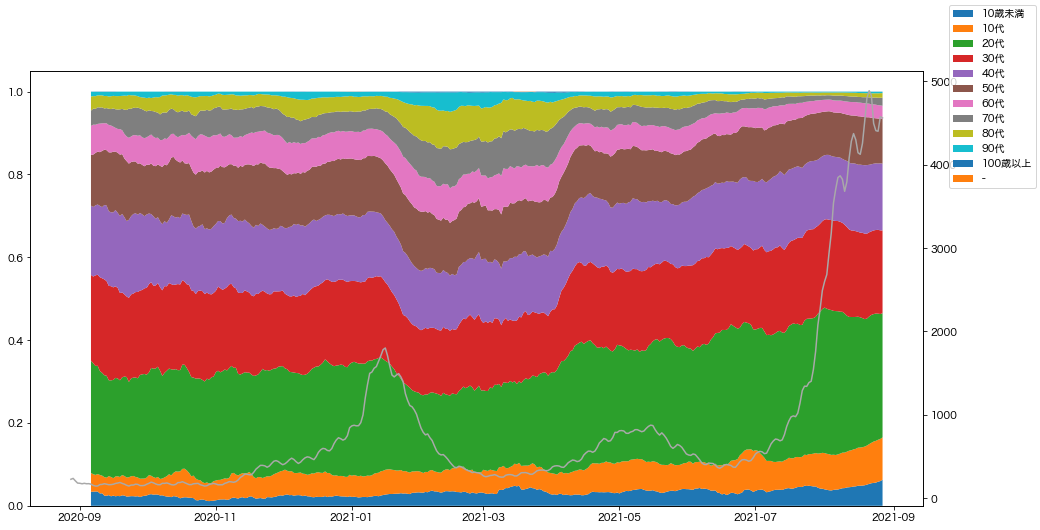

In [19]:
fig = plt.figure(figsize=(16, 8))

ax1 = fig.subplots()
ax2 = ax1.twinx()

ax1.stackplot(cross_df.index, cross_df.rolling(10).mean().drop('All', axis=1).T, labels=['10歳未満', '10代', '20代', '30代', '40代', '50代', '60代', '70代','80代', '90代', '100歳以上', '-'])
ax2.plot(cross_df['All'].rolling('10d').mean(), color='darkgray')

fig.legend()
